In [ ]:
# 1                         A unique id 
# 2	Gender                  Gender of the applicant Male/female
# 3	Married                 Marital Status of the applicant, values will be Yes/ No
# 4	Dependents              It tells whether the applicant has any dependents or not.
# 5	Education               It will tell us whether the applicant is Graduated or not.
# 6	Self_Employed           This defines that the applicant is self-employed i.e. Yes/ No
# 7	ApplicantIncome         Applicant income
# 8	CoapplicantIncome       Co-applicant income
# 9	LoanAmount              Loan amount (in thousands)
# 10	Loan_Amount_Term    Terms of loan (in months)
# 11	Credit_History      Credit history of individual’s repayment of their debts
# 12	Property_Area       Area of property i.e. Rural/Urban/Semi-urban 
# 13	Loan_Status         Status of Loan Approved or not i.e. Y- Yes, N-No 

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("loan.csv")

In [2]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [3]:
data.drop(['Loan_ID'],axis=1,inplace=True)

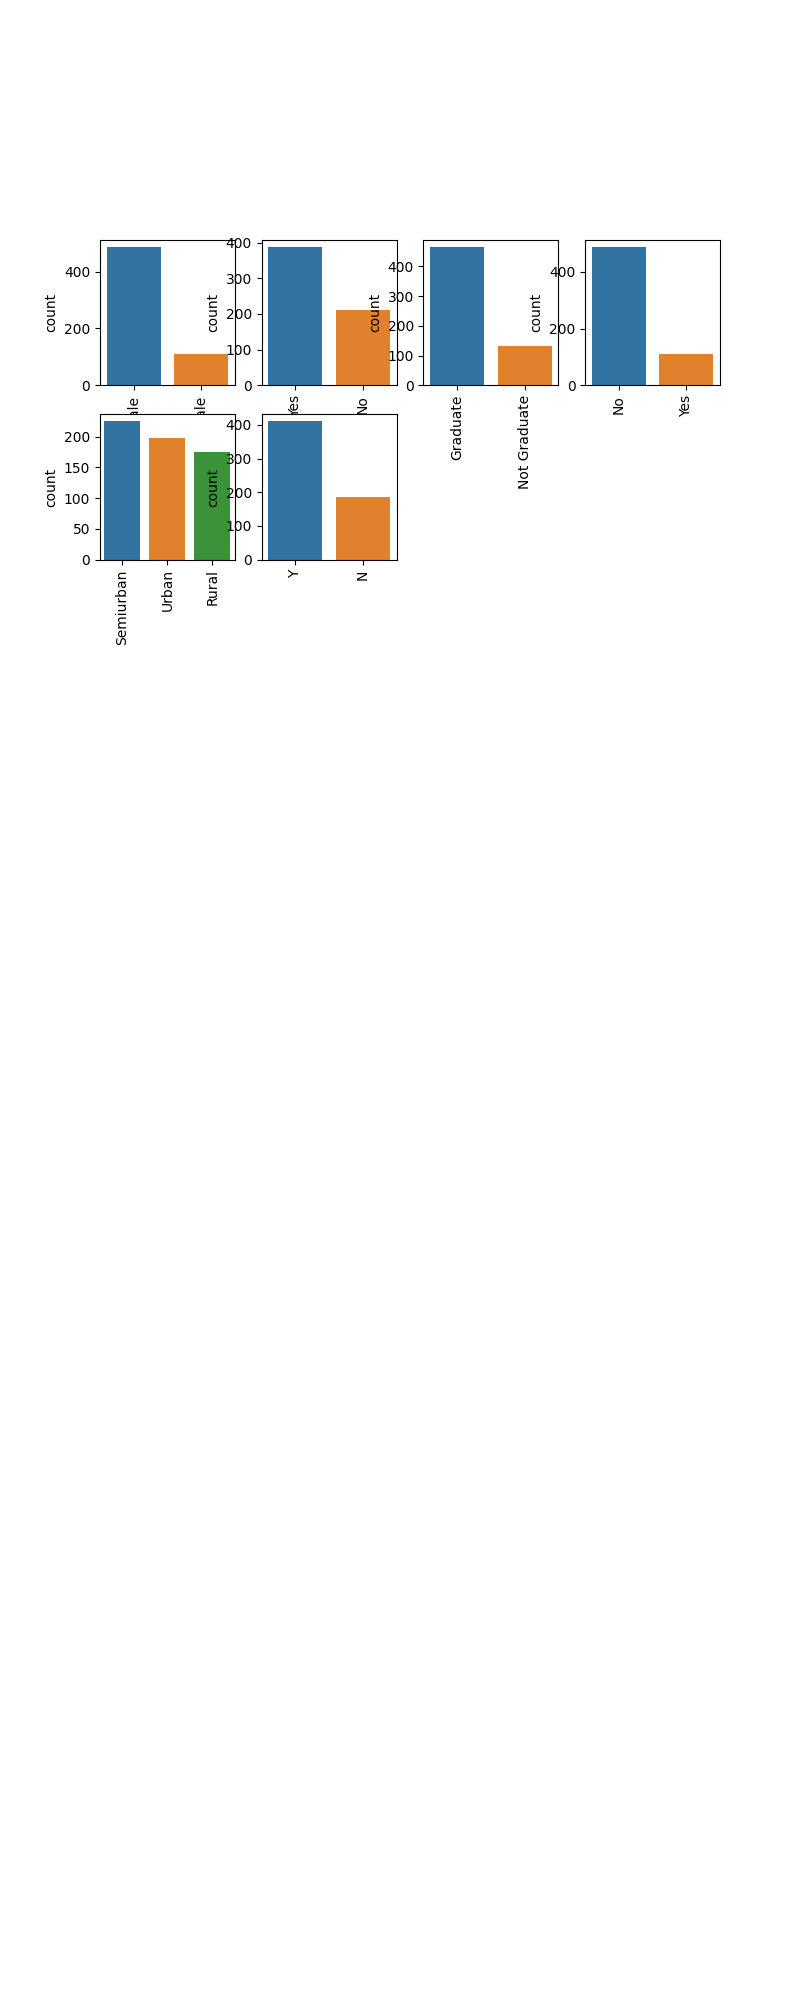

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(8,20))
index = 1
  
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(9,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [11]:
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [12]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

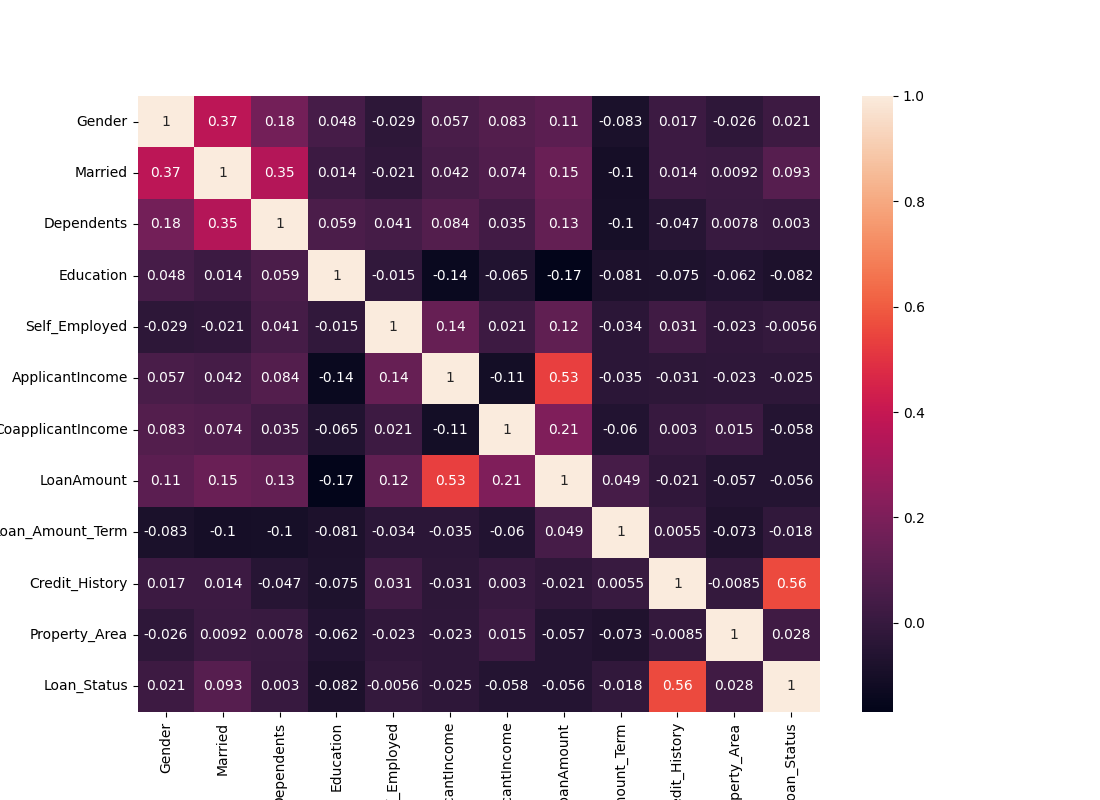

In [13]:
plt.figure(figsize=(11,8))
  
sns.heatmap(data.corr(), annot=True)

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


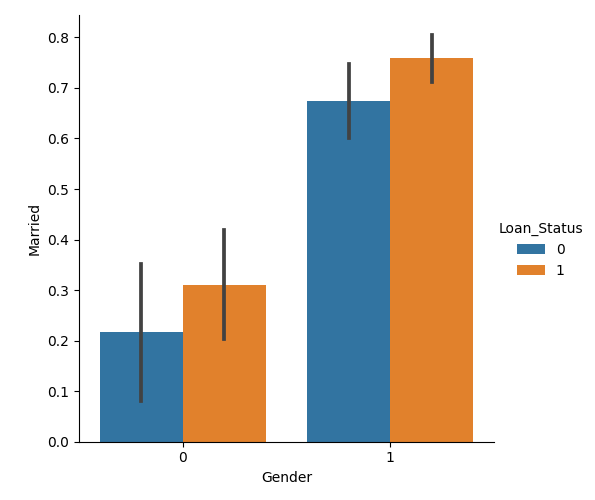

In [14]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=data)

In [15]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
  
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((478, 11), (120, 11), (478,), (120,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)  
lc = LogisticRegression()
  
# making predictions on the training set
for clf in ( knn, lc):
    clf.max_iter=10000
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  KNeighborsClassifier = 75.73221757322176
Accuracy score of  LogisticRegression = 80.5439330543933
